# Importing Libraries
* Tensorflow
* Keras
* Sci-Kit Learn
* MLXtend
* Pandas
* Numpy
* Matplotlib

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Modelling
* Loading Data from Source: Sci-Kit Learn Datasets
* Data Preprocessing
  * Data Cleaning
  * Normalization/Standardization


In [0]:
# Loading data from source

cancer = datasets.load_breast_cancer()

In [0]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
X = pd.DataFrame(data= cancer.data, columns=cancer.feature_names)

In [0]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y = cancer.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify =y)

In [0]:
# Scale down the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [0]:
# Reshape data in order to feed to CNN

X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

# CNN Model
* Building Model
  * ReLU Layer
  * Pooling Layer
  * Flattening
  * Fully Connected
  * Output Layer
* Model Training
* Model Compilation
* Model Evaluation

In [0]:
# Building a CNN Model

model = Sequential()

model.add(Conv1D(32,3, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', ))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 32)            128       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 26, 64)            6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 64)            256       
_________________________________________________________________
flatten (Flatten)            (None, 1664)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               213120    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [0]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics='accuracy')

In [0]:
history = model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
15/15 [==============================] - 0s 22ms/step - loss: 0.2658 - accuracy: 0.8989 - val_loss: 0.4811 - val_accuracy: 0.9561
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0455 - accuracy: 0.9824 - val_loss: 0.4267 - val_accuracy: 0.9386
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0343 - accuracy: 0.9912 - val_loss: 0.3826 - val_accuracy: 0.9386
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0266 - accuracy: 0.9890 - val_loss: 0.3527 - val_accuracy: 0.9298
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.9978 - val_loss: 0.3249 - val_accuracy: 0.9211
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.9934 - val_loss: 0.2815 - val_accuracy: 0.9474
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.9868 - val_loss: 0.2813 - val_accuracy: 0.9123
Epoch 8/50
15/15 

In [0]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9649


[0.12978729605674744, 0.9649122953414917]

# Performance Metrics
* Learning Curve
* Confusion Matrix

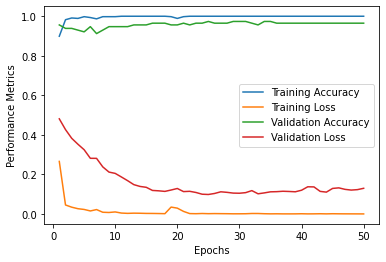

In [0]:
# Plotting Learning Curve for Model Accuracy and Loss on Training Data and Validation Data

epochs = range(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_accuracy'])
plt.plot(epochs, history.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Performance Metrics')
plt.legend(['Training Accuracy','Training Loss','Validation Accuracy','Validation Loss'])
plt.show()